<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_ML/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM 1**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

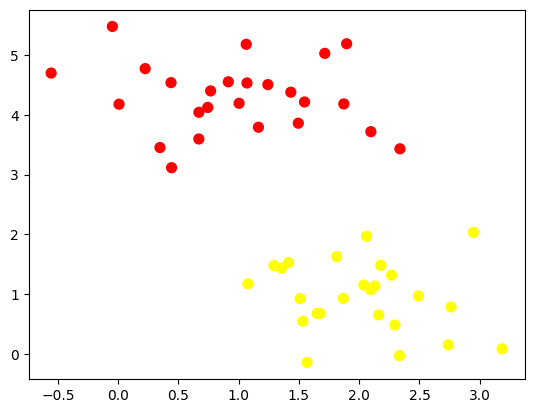

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

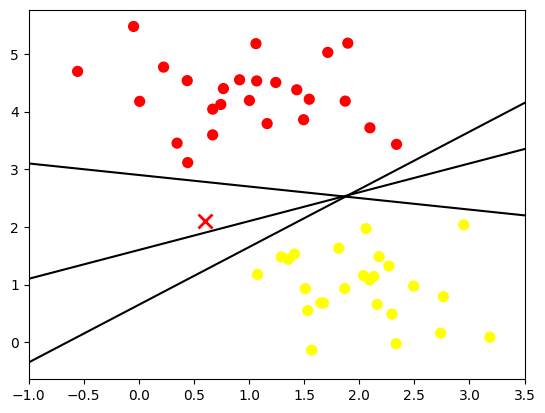

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

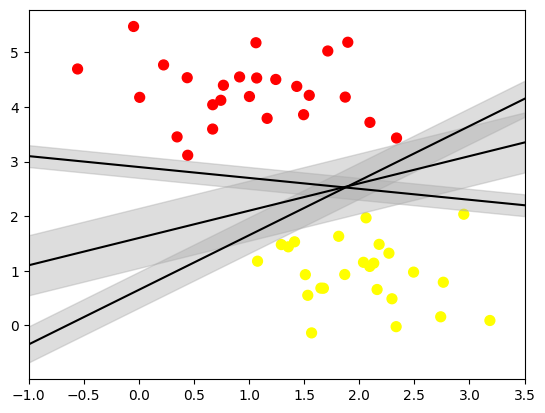

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [ ]:
# FITTING

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
SVC(C=10000000000.0, kernel='linear')

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

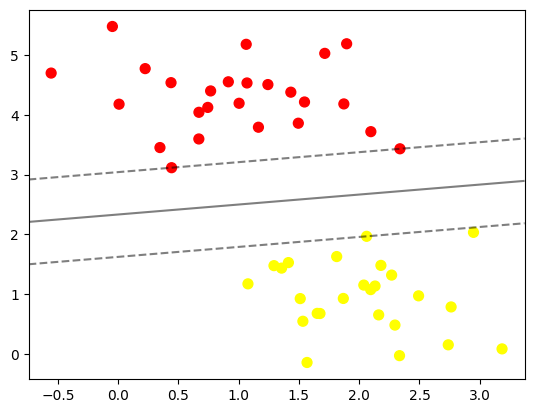

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

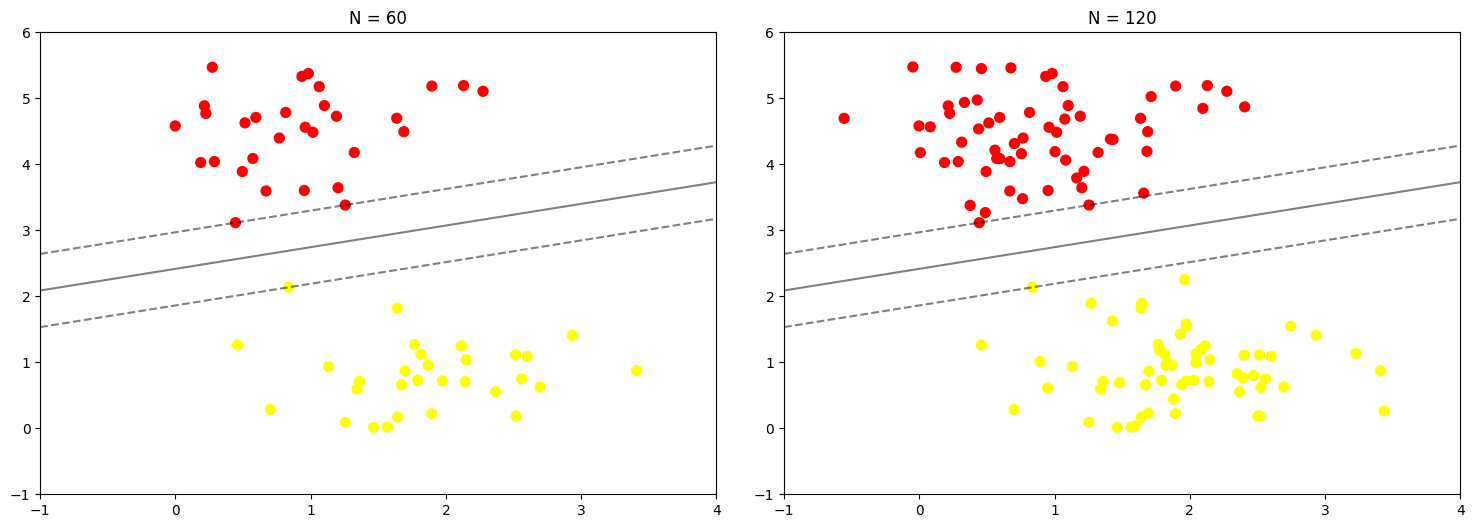

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

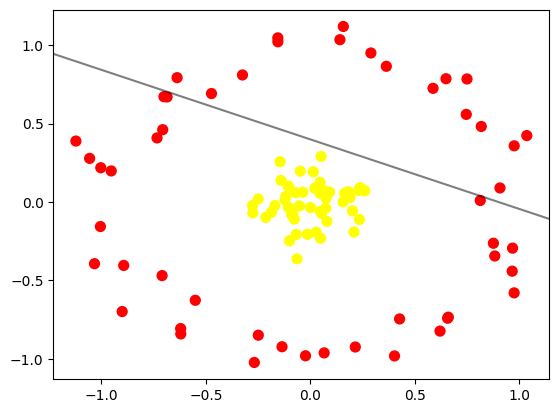

In [ ]:
# DATA TIDAK TERPISAH SECARA LINIER

# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.40299901e-01,  1.37632233e-01],
       [ 2.01709103e-01, -5.63750514e-02],
       [-8.95252288e-02, -8.15055567e-02],
       [-1.12195997e+00,  3.89170763e-01],
       [ 7.45619062e-01,  5.59250328e-01],
       [-1.03291227e+00, -3.93676435e-01],
       [ 2.89408630e-01,  9.51152104e-01],
       [ 9.74955956e-01,  3.58715549e-01],
       [ 2.12252235e-02,  8.84274716e-02],
       [ 4.86794066e-02, -2.31305211e-01],
       [-1.20829653e-01,  1.44381951e-02],
       [-7.06607735e-01,  4.61618929e-01],
       [ 7.53491794e-02,  6.67023869e-02],
       [ 2.60149393e-01,  7.13468840e-02],
       [ 4.60079628e-02,  5.59086512e-02],
       [ 4.56650944e-02,  1.05725959e-01],
       [ 1.81611180e-01,  6.51804392e-02],
       [-2.13381288e-01, -9.80943163e-02],
       [ 5.20517898e-02, -7.13807464e-02],
       [ 1.41263386e-01,  1.03607818e+00],
       [-5.25794035e-02, -2.51210315e-02],
       [-1.00373255e-01, -2.47654472e-01],
       [ 2.69157111e-02, -1.93069356e-01],
       [ 3.63192558e-01,  8.66122039e-01],
       [ 2.31374875e-01,  7.44345644e-02],
       [-8.93082493e-01, -4.04723612e-01],
       [-2.75477280e-01, -6.89593435e-02],
       [-3.25022993e-01,  8.10837081e-01],
       [-7.33761105e-01,  4.09201236e-01],
       [-6.85697432e-01,  6.70481072e-01],
       [ 8.17525229e-01,  4.82169460e-01],
       [-1.05526971e-01, -3.30300762e-02],
       [ 6.57803663e-02, -9.62727614e-01],
       [ 6.56548024e-01, -7.41479820e-01],
       [-9.00503823e-01, -6.98940237e-01],
       [ 9.74770242e-01, -5.79769089e-01],
       [-3.66473626e-02,  6.25685008e-02],
       [-1.86735629e-01, -6.61545093e-02],
       [-8.64418727e-02, -7.28699995e-02],
       [-1.40089629e-02, -2.06224279e-01],
       [-1.55616517e-01,  1.02271510e+00],
       [ 8.75562991e-01, -2.62994764e-01],
       [-6.37819790e-01,  7.93497651e-01],
       [-7.09598568e-01, -4.69491036e-01],
       [-2.76855660e-01, -2.22587038e-02],
       [-4.73289070e-01,  6.92184011e-01],
       [ 9.16172257e-02,  6.31267221e-02],
       [-7.68110069e-02, -1.08765729e-01],
       [ 6.86218275e-02,  4.36050593e-02],
       [ 6.48729455e-01,  7.86900940e-01],
       [ 2.08664461e-01, -1.91216268e-01],
       [ 8.12600231e-01,  9.83943943e-03],
       [-7.00778209e-01,  6.72181900e-01],
       [ 6.20120831e-01, -8.23747990e-01],
       [-2.34316162e-02, -9.81168955e-01],
       [ 2.34665312e-01, -1.11610071e-01],
       [-1.00471399e+00, -1.56474047e-01],
       [ 7.49243229e-01,  7.85350750e-01],
       [-1.35797287e-01, -9.23618805e-01],
       [-1.05614254e-01,  1.01208917e-01],
       [-1.00281399e+00,  2.18751090e-01],
       [ 1.64512884e-01,  5.68177532e-02],
       [ 1.03530527e+00,  4.24036566e-01],
       [ 9.67162075e-01, -2.94199650e-01],
       [ 1.57458776e-01,  1.12029124e+00],
       [-6.20132755e-01, -8.41844214e-01],
       [ 6.59840484e-01, -7.34947057e-01],
       [ 2.14759762e-01, -9.25133385e-01],
       [ 4.26712956e-01, -7.46088550e-01],
       [-2.68194523e-01, -1.02396532e+00],
       [-1.05619336e+00,  2.78443835e-01],
       [-9.52901915e-01,  1.98391541e-01],
       [ 4.74125844e-02, -5.92074143e-02],
       [-6.81620636e-02, -2.07234550e-01],
       [-1.69954250e-01, -2.29767508e-02],
       [ 7.49782690e-02,  2.45200495e-02],
       [ 4.58371722e-02,  1.25421567e-01],
       [ 9.06891388e-01,  8.97594036e-02],
       [ 7.31431386e-02, -3.99143221e-02],
       [ 7.90238032e-02, -1.23731878e-01],
       [-2.49348791e-01, -8.49796689e-01],
       [-1.55844047e-01,  1.04761646e+00],
       [-1.44994070e-01,  2.57259195e-01],
       [-9.17235164e-05, -3.48732719e-02],
       [-6.40833763e-02, -3.62562783e-01],
       [-7.06009084e-02,  6.03775476e-02],
       [-6.20794810e-01, -8.07790977e-01],
       [ 1.36158937e-02,  1.93033843e-01],
       [ 9.65377702e-01, -4.41200978e-01],
       [ 1.56697465e-01,  7.58124302e-04],
       [-2.49702999e-01,  1.92521576e-02],
       [ 1.89636225e-01,  2.87386652e-02

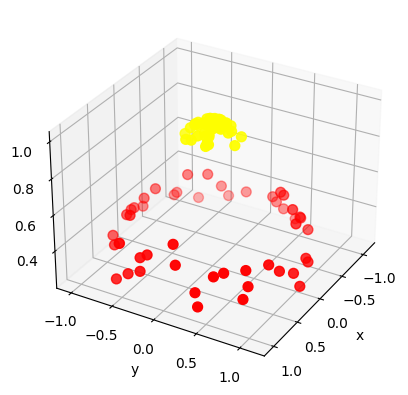

In [ ]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

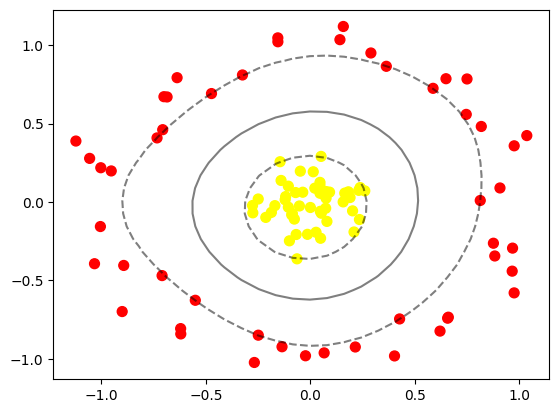

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

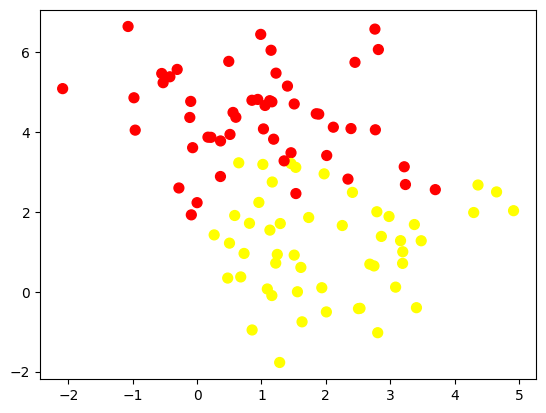

In [ ]:
# DATA OVERLAP

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

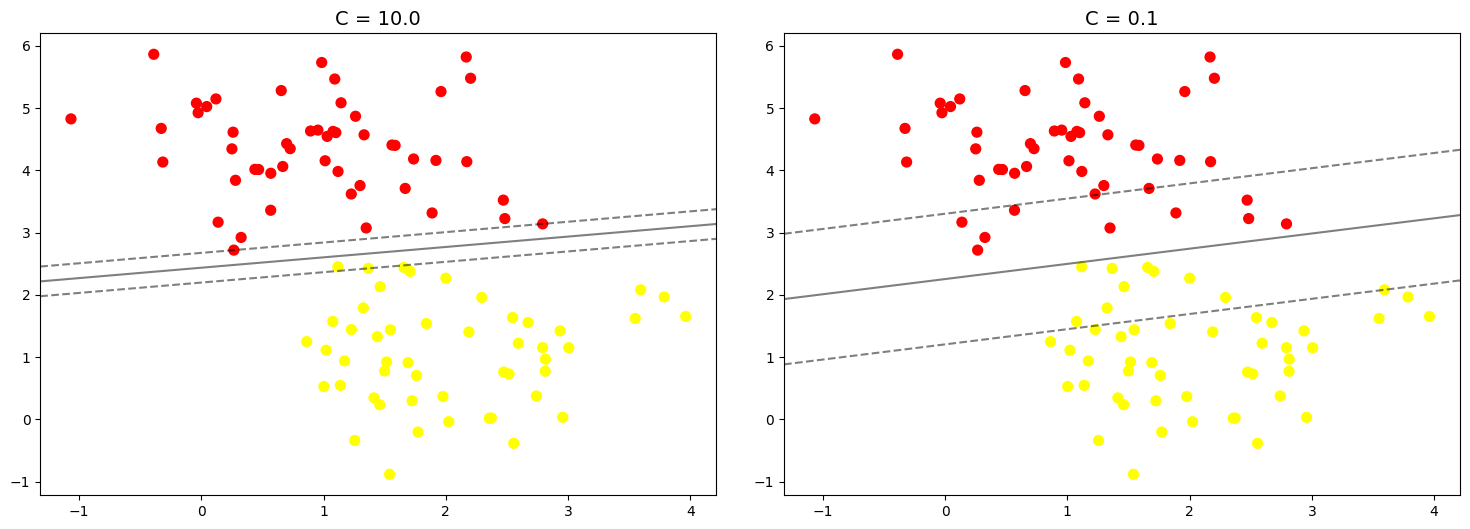

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

**PRAKTIKUM 2**

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


In [ ]:
type(faces)

sklearn.utils._bunch.Bunch

In [ ]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [ ]:
faces.data

array([[0.53464055, 0.5254902 , 0.49673203, ..., 0.00653595, 0.00653595,
        0.00261438],
       [0.28627452, 0.20784314, 0.2522876 , ..., 0.96993464, 0.9490196 ,
        0.9346406 ],
       [0.31895426, 0.39215687, 0.275817  , ..., 0.4261438 , 0.7908497 ,
        0.9555555 ],
       ...,
       [0.11633987, 0.11111111, 0.10196079, ..., 0.5686274 , 0.5803922 ,
        0.5542484 ],
       [0.19346406, 0.21176471, 0.2901961 , ..., 0.6862745 , 0.654902  ,
        0.5908497 ],
       [0.12287582, 0.09803922, 0.10980392, ..., 0.12941177, 0.1633987 ,
        0.29150328]], dtype=float32)

In [ ]:
faces.data.shape

(1348, 2914)

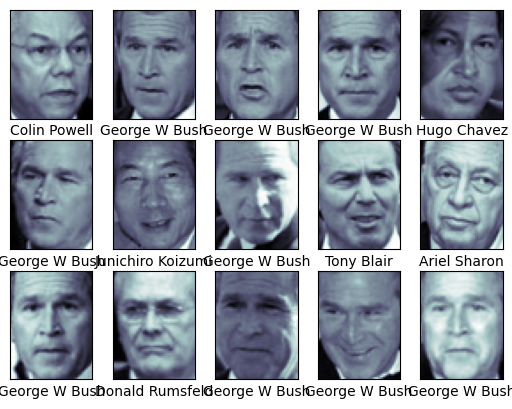

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 39s, sys: 27.9 s, total: 2min 6s
Wall time: 1min 16s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
# PREDIKSI LABEL UNTUK DATA TESTING

model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

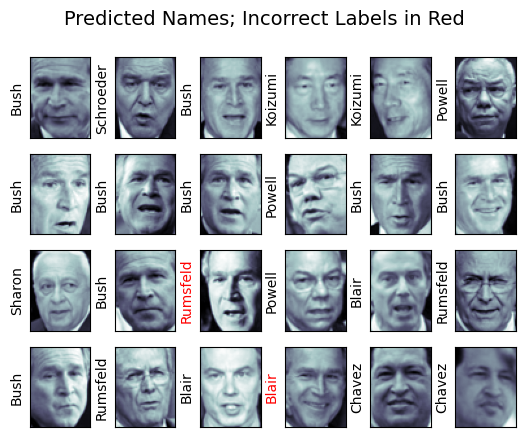

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

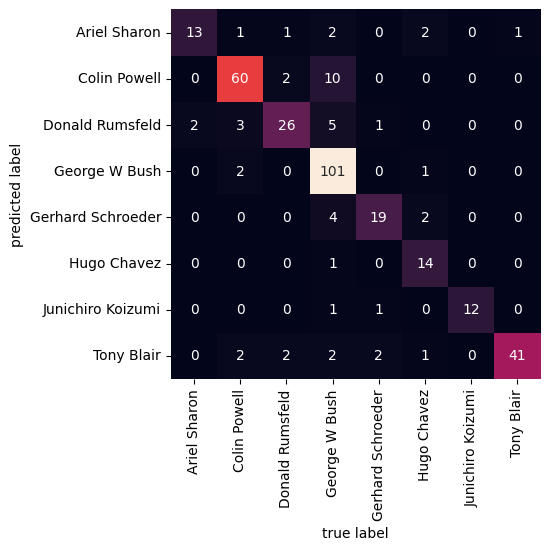

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

**PRAKTIKUM 3**

In [ ]:
# MENDEFINISIKAN DATA DUMMY

import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[102  92]
 [150 129]
 [191  66]
 [ 64 105]
 [ 50 142]
 [121  82]
 [137  68]
 [ 38  59]
 [134   1]
 [ 88  27]
 [ 56 177]
 [ 75 216]
 [133 181]
 [138  28]
 [115 151]
 [ 92 102]
 [ 67 259]
 [ 95  87]
 [ 67 187]
 [ 46 134]
 [ 24 254]
 [149  15]
 [134  56]
 [118 129]
 [121 130]
 [110 100]
 [ 74  79]
 [ 76 173]
 [ 93  52]
 [ 83  46]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [ ]:
# MEMBUAT DATA FRAME
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,102,92,0
1,150,129,0
2,191,66,0
3,64,105,0
4,50,142,0


In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,102,92,Kelas B
1,150,129,Kelas B
2,191,66,Kelas B
3,64,105,Kelas B
4,50,142,Kelas B


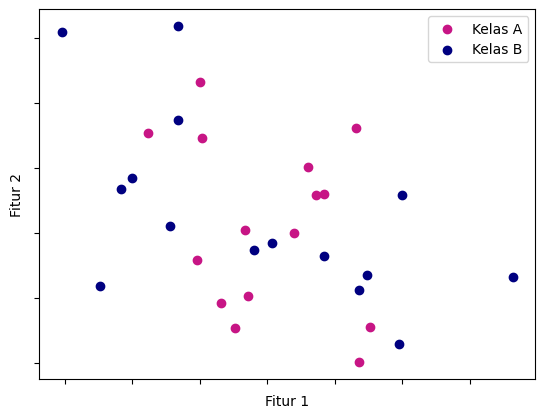

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [ ]:
# KLASIFIKASI MULTINOMIAL NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5238095238095238
Hasil akurasi data test: 0.6666666666666666


In [ ]:
# KLASIFIKASI GAUSSIAN NAIVE BAYES

from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.5555555555555556


**PRAKTIKUM 5**

In [1]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [8]:
# Image directories
train_dir = "/content/drive/MyDrive/images/training"
test_dir = "/content/drive/MyDrive/images/test"

In [9]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [10]:
# Load training data
train_img = load_dataset(train_dir)

In [13]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[24, 13, 11],
         [27, 16, 12],
         [25, 14, 10],
         ...,
         [26, 24, 12],
         [13, 13,  1],
         [ 9,  9,  0]],
 
        [[11,  0,  0],
         [23, 12, 10],
         [30, 19, 15],
         ...,
         [27, 25, 13],
         [10, 10,  0],
         [ 7,  7,  0]],
 
        [[34, 22, 22],
         [30, 19, 17],
         [28, 17, 15],
         ...,
         [23, 21,  9],
         [13, 13,  1],
         [18, 18,  6]],
 
        ...,
 
        [[29, 18, 24],
         [13,  2,  8],
         [14,  3,  7],
         ...,
         [ 6,  7,  2],
         [ 2,  4,  0],
         [ 4,  6,  1]],
 
        [[29, 18, 24],
         [ 9,  0,  4],
         [12,  1,  5],
         ...,
         [18, 19, 14],
         [31, 33, 28],
         [47, 49, 44]],
 
        [[25, 14, 20],
         [23, 12, 18],
         [27, 16, 20],
         ...,
         [ 3,  4,  0],
         [ 5,  8,  1],
         [ 8, 11,  4]]], dtype=uint8),
 'night')

In [14]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 2
(737, 1024, 3)


In [15]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (737, 1024, 3)
Label	: night


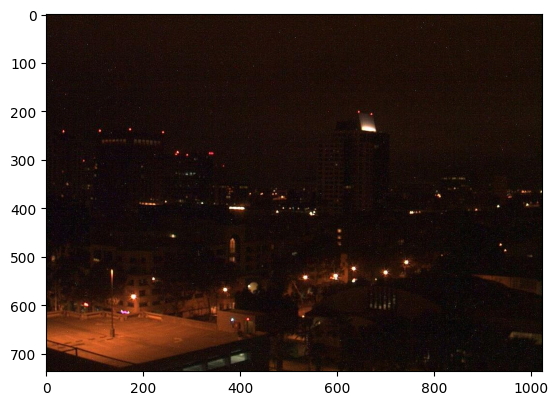

In [16]:
random_img_viz(train_img)

In [17]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [18]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [19]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [20]:
train_std_img_list = preprocess(train_img)

In [23]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 8
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


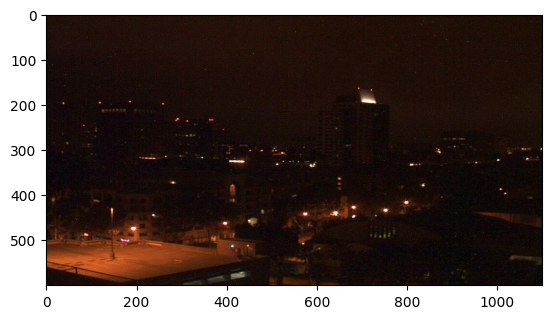

In [24]:
random_img_viz(train_std_img_list)

In [25]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 3
Avg Brighness: 33.0155


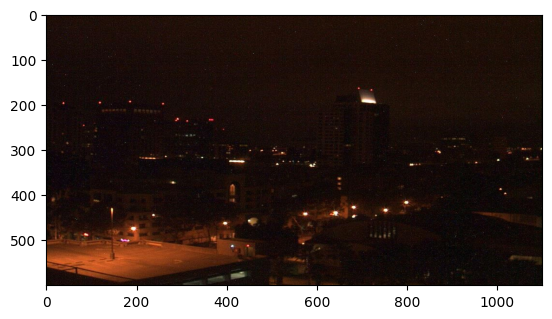

In [26]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [27]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 2
Actual label: 0
Predicted label: 0


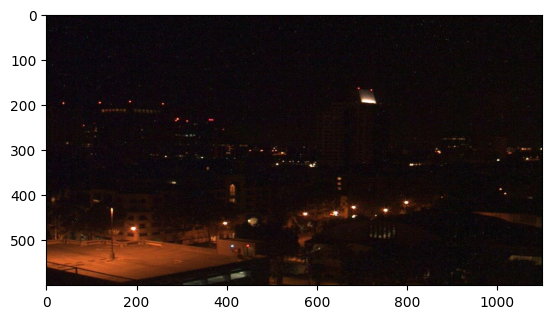

In [28]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [33]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [34]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 1.0000


In [36]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

ZeroDivisionError: division by zero

In [38]:
print(f'Preprocessed images: {test_std_img_list}')


Preprocessed images: []
